<a href="https://colab.research.google.com/github/cata123/Machine-learning/blob/main/ParcialPracticoML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seleccionar la data que deseen, sobre la data seleccionada aplicar los siguientes 6 algoritmos**:

1. Logistic Regression
2. Nearest Neighbor
3. Support Vector Machines 
4. Naive Bayes
5. Decision Tree Algorithm
6. Random Forest Classification

Importar librerías

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Cargar dataset

In [ ]:
iris = datasets.load_iris()

Dividir los datos

In [ ]:
iris_feature = iris.data
iris_target = iris.target
print(iris_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
feature_train, feature_test, target_train, target_test = train_test_split(iris_feature, iris_target, test_size=0.25,random_state=100)
print(target_train)

[2 2 0 1 2 2 0 0 0 0 1 0 0 0 1 2 2 1 2 1 2 2 1 0 2 2 2 0 0 2 0 0 0 1 2 2 2
 0 1 1 0 1 1 2 0 1 1 1 1 1 1 2 2 0 1 0 1 2 2 2 1 0 0 0 0 2 0 0 1 0 2 1 2 0
 2 2 0 1 1 1 2 1 1 0 0 0 2 1 1 0 2 2 2 1 1 1 1 2 2 0 0 1 1 1 1 2 1 1 2 1 0
 0]


# **Arboles  de decisión (Decision Tree Algorithm)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(feature_train, target_train)
predict_results_AD= dt_model.predict(feature_test)
scores = dt_model.score(feature_test, target_test)
print(predict_results)
print(target_test)

[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1]
[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2 1 1 2 0 0 1 0
 1]


In [ ]:
print(accuracy_score(predict_results_AD, target_test))
print(scores)

0.9473684210526315
0.9473684210526315


# **Regresión Logística (Logistic Regression)**

[[13  0  0]
 [ 0 17  2]
 [ 0  0 18]]


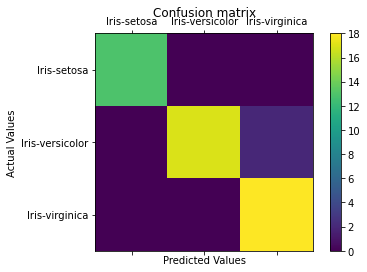

In [ ]:
import warnings
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline  

#ignorar warnings
warnings.filterwarnings('ignore')
df = pd.read_csv(url)
# valores de X y y
X = df.iloc[:,0:4]
y = df.iloc[:,4]
#Tamaño de la información de test
test_size = 0.33
#generar el random
seed = 7
#preparando la data de entrenamiento
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#Modelo de predicción
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Construyendo la matriz de confusión 
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
#dividiendo la data de validación
kfold = model_selection.KFold(n_splits=10, random_state=seed)
#Llamando el modelo de predicción
model = LogisticRegression()
#Evaluando el modelo con los valores del set
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

#definiendo la data de entrenamiento
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#entrenando el modelo
model.fit(X_train, y_train)
#Evaluando el modelo con los valores de test
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy -val set: 94.67% (0.06)
Accuracy - test set: 92.00%


# **Naive Bayes**

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
dataset = datasets.load_iris()

#Aquí tenemos un  GaussianNB() método que realiza exactamente las mismas funciones que el código explicado anteriormente
model = GaussianNB()
model.fit(dataset.data, dataset.target)

#Haciendo predicciones
expected = dataset.target
predicted = model.predict(dataset.data)
predicted
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


# **Nearest Neighbor**




# **Bosques Aleatorios (Random Forest Classification)**

Información en el dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Características del dataset:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76  

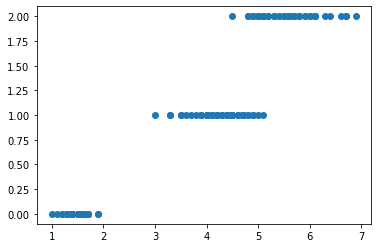

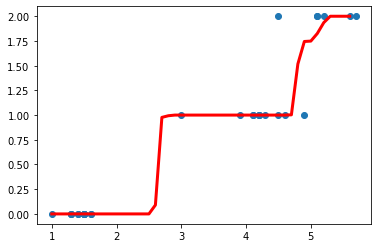

DATOS DEL MODELO BOSQUES ALEATORIOS REGRESION

Precisión del modelo:
0.9585663700310931


In [ ]:
print('Información en el dataset:')
print(iris.keys())
print()
#Verifico las características del dataset
print('Características del dataset:')
print(iris.DESCR)
#Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(iris.data.shape)
print()
#Verifico la información de las columnas
print('Nombres columnas:')
print(iris.feature_names)
########## PREPARAR LA DATA BOSQUES ALEATORIOS REGRESIÓN ##########
#Seleccionamos solamente la columna 2 del dataset
X_bar = iris.data[:, np.newaxis, 2]
#Defino los datos correspondientes a las etiquetas
y_bar = iris.target
#Graficamos los datos correspondientes
plt.scatter(X_bar, y_bar)
plt.show()
########## IMPLEMENTACIÓN DE BOSQUES ALEATORIOS REGRESIÓN ##########
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_bar, y_bar, test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
#Defino el algoritmo a utilizar
bar = RandomForestRegressor(n_estimators = 300, max_depth = 8)
#Entreno el modelo
bar.fit(X_train, y_train)
#Realizo una predicción
Y_pred = bar.predict(X_test)
#Graficamos los datos de prueba junto con la predicción
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test)
plt.plot(X_grid, bar.predict(X_grid), color='red', linewidth=3)
plt.show()
#
print('DATOS DEL MODELO BOSQUES ALEATORIOS REGRESION')
print()
print('Precisión del modelo:')
print(bar.score(X_train, y_train))


# **Support Vector Machines**